In [14]:
import torch
import skimage
import sys, os

sys.path.insert(1, '/home/msst/repo/VesselSegmentation')

from ml.ClassVesselSample import VesselSample
from scripts.utils import get_path
import matplotlib.pyplot as plt

from ml.models.HessNet_new import HessianTorch

In [11]:
sample_index='111'

path_to_sample_dir = f"/home/msst/IXI_MRA_work/IXI{sample_index}"
path_to_head = get_path(f'/home/msst/IXI_MRA_work/IXI{sample_index}', key='head')

#GT
sample = VesselSample(path_to_sample_dir)
head = sample.get_subject()['head'].data[0]
head.shape

#head = head[:, :, 0]

torch.Size([512, 512, 100])

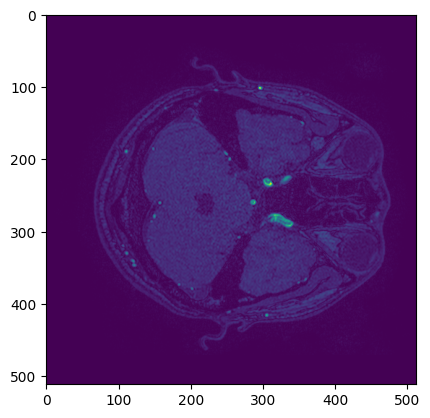

In [12]:
plt.imshow(head[:, :, 0])

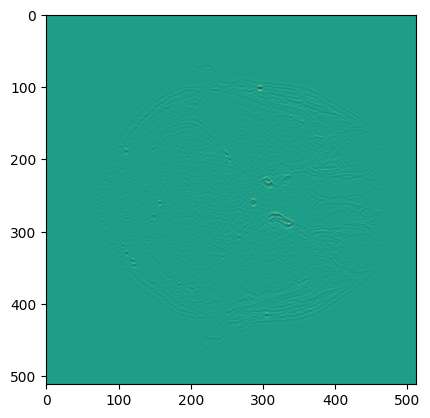

In [17]:
head_hess = HessianTorch()(head.unsqueeze(0).unsqueeze(0))[0].squeeze(0).squeeze(0)
plt.imshow(head_hess[:, :, 0])

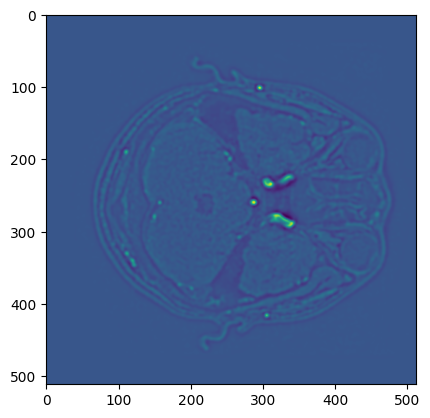

In [24]:
dog_head = skimage.filters.difference_of_gaussians(head[:, :, :], 2)
plt.imshow(dog_head[:, :, 0])

In [6]:
from skimage import data, feature, color, img_as_float
from  skimage.filters import gaussian_filter
from matplotlib import pyplot as plt


original_image = img_as_float(data.chelsea())
img = color.rgb2gray(original_image)

k = 1.6

plt.subplot(2,3,1)
plt.imshow(original_image)
plt.title('Original Image')

for idx,sigma in enumerate([4.0,8.0,16.0,32.0]):
	s1 = filter.gaussian_filter(img,k*sigma)
	s2 = filter.gaussian_filter(img,sigma)

	# multiply by sigma to get scale invariance
	dog = s1 - s2
	plt.subplot(2,3,idx+2)
	print(dog.min(),dog.max())
	plt.imshow(dog,cmap='RdBu')
	plt.title('DoG with sigma=' + str(sigma) + ', k=' + str(k))

ax = plt.subplot(2,3,6)
blobs_dog = [(x[0],x[1],x[2]) for x in feature.blob_dog(img, min_sigma=4, max_sigma=32,threshold=0.5,overlap=1.0)]
# skimage has a bug in my version where only maxima were returned by the above
blobs_dog += [(x[0],x[1],x[2]) for x in feature.blob_dog(-img, min_sigma=4, max_sigma=32,threshold=0.5,overlap=1.0)]

#remove duplicates
blobs_dog = set(blobs_dog)

img_blobs = color.gray2rgb(img)
for blob in blobs_dog:
	y, x, r = blob
	c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
	ax.add_patch(c)
plt.imshow(img_blobs)
plt.title('Detected DoG Maxima')

plt.show()

ImportError: cannot import name 'gaussian_filter' from 'skimage.filters' (/home/msst/.venv/segvenv/lib/python3.10/site-packages/skimage/filters/__init__.py)